In [77]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

in the regularization implementation we will use the multiple linear regression as an example  
we will add some noise (useless) columns to the data so we can test overfitting and have full control over the data 

we will also follow the same steps as we did before

# data loading 

In [78]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

# Exploratory data analysis and data cleaning

In [79]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [80]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [81]:
df = df.drop(["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "FUELTYPE", "TRANSMISSION"], axis=1)

In [82]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [83]:
df = df.drop(["CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"], axis=1)

adding random 15 noise features

In [84]:
# Injecting 15 columns of pure random noise
np.random.seed(42)
num_noise_cols = 15

for i in range(num_noise_cols):
    # Generating random numbers that have no mathematical relationship to 'y'
    df[f'Noise_Feature_{i+1}'] = np.random.rand(len(df)) * 100 

# Rename the first noise column just for the joke
df.rename(columns={'Noise_Feature_1': 'owner_shoe_size'}, inplace=True)

In [85]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,owner_shoe_size,Noise_Feature_2,Noise_Feature_3,Noise_Feature_4,Noise_Feature_5,Noise_Feature_6,Noise_Feature_7,Noise_Feature_8,Noise_Feature_9,Noise_Feature_10,Noise_Feature_11,Noise_Feature_12,Noise_Feature_13,Noise_Feature_14,Noise_Feature_15
0,2.0,33,196,37.454012,11.047411,71.935362,50.313247,81.372334,94.470738,20.351111,33.414302,13.625057,4.390461,90.888744,64.439616,81.708495,30.925611,36.686839
1,2.4,29,221,95.071431,35.462216,89.025805,19.386307,94.050395,33.487829,87.336112,81.790418,88.756307,65.369869,21.502257,71.405433,82.494693,64.317862,76.083103
2,1.5,48,136,73.199394,28.723899,7.940658,85.881677,64.876539,57.085394,5.976227,3.836386,47.076239,77.393613,20.459361,29.261273,23.707729,88.221241,48.537290
3,3.5,25,255,59.865848,29.630812,73.149649,67.694078,95.456593,90.959539,88.859928,87.079717,87.811520,81.382913,18.150796,32.233331,32.366278,40.215048,20.108349
4,3.5,27,244,15.601864,23.360775,18.741194,83.790837,15.143231,0.618382,32.907378,51.274990,58.585212,49.350918,1.398171,43.799775,48.131038,6.662209,12.442338


# data preprocessing 

In [86]:
X = df.drop(columns=['CO2EMISSIONS'])
y = df['CO2EMISSIONS']

In [87]:
def standard_scaler(X):
    # calculating the mean and standard derivation
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)

    # Handle the case where std might be 0 to avoid division by zero
    std_replaced = np.where(std == 0, 1, std)

    X_scaled = (X - mean) / std_replaced

    return X_scaled, mean, std

X_scaled, mu, sigma = standard_scaler(X)

In [88]:
m = X_scaled.shape[0]
X_final = np.c_[np.ones(m), X_scaled]

In [89]:
print(f"X shape: {X_final.shape}")
print(f"y shape: {y.shape}")

X shape: (1067, 18)
y shape: (1067,)


In [90]:

def train_test_split(X, Y, split):

    # creates a simple list of numbers from $0$ up to the number of samples you have.
    # Instead of moving the actual data around (which is heavy), we just shuffle these numbers. It’s much faster.
    indices = np.array(range(len(X)))

    # calculates how many rows will go into your "Training" bucket.
    train_size = round(split * len(X))

    # Randomize the "ID cards"
    np.random.shuffle(indices)

    # assigning the needed indices for training and the rest for testing 
    train_indices = indices[0:train_size]
    test_indices = indices[train_size:len(X)]

    # extracting the data for the X_train, X_test, Y_train and Y_test
    X_train = X[train_indices, :]
    X_test = X[test_indices, :]
    Y_train = Y.iloc[train_indices]
    Y_test = Y.iloc[test_indices]
    
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = train_test_split(X_final, y, .8)

# model training (normal multiple linear regression)

In [91]:
# first we create a class as we want the params to be kept as objects 
class MultipleLinearRegression:
    # setting up the hyper params and placeholders in the __init__ function
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None
        self.cost_history = []

    # making a fit function
    def fit(self, x, y):
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = x.shape
        # Initializing weights randomly
        self.theta = np.random.rand(n_features, 1)

        # gradient descent loop (each iteration = one gradient descent step)
        for i in range(self.n_iters):
            # 1. Calculate predictions for all samples
            predictions = np.dot(x, self.theta)
            
            # 2. Calculate errors
            error = predictions - y
            
            # 3. Calculate gradient
            gradient = (1/n_samples) * np.dot(x.T, error)
            
            # 4. Update theta
            self.theta -= (self.lr * gradient)

            cost = (1 / (2 * n_samples)) * np.sum(error ** 2)
            self.cost_history.append(cost)

    # prediction function
    def predict(self, X):
        return np.dot(X, self.theta)

In [92]:
model = MultipleLinearRegression(.01, 1000)
model.fit(X_train, Y_train)

Final Test MSE: 541.213675421607
Learned Bias: [256.24299751]
Learned Weights: 
[[ 2.71815717e+01]
 [-3.49084317e+01]
 [-2.26786698e-02]
 [ 3.91836816e-03]
 [ 1.39311835e-01]
 [ 6.42548104e-01]
 [ 8.49683807e-01]
 [ 2.65756862e-01]
 [-1.72130440e+00]
 [-4.84894611e-01]
 [-4.77307430e-01]
 [ 8.79857291e-02]
 [-9.09987976e-01]
 [ 1.79306209e-02]
 [-5.24474544e-01]
 [ 4.25001385e-01]
 [ 7.86376139e-02]]


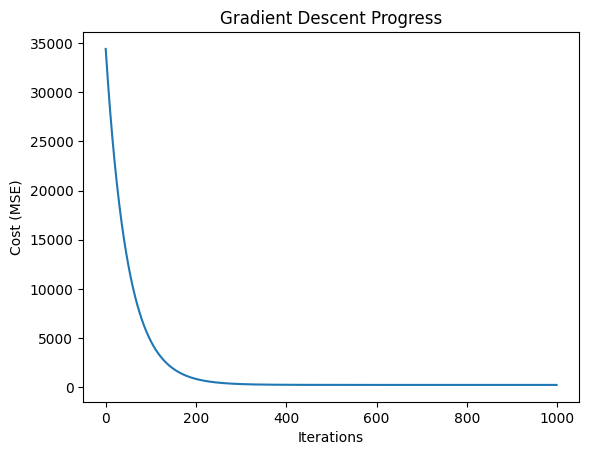

In [93]:
predictions = model.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {model.theta[0]}")
print(f"Learned Weights: \n{model.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [94]:
# predicting the Training data
train_predictions = model.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = model.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 467.38
Testing MSE:  541.21
Overfitting Gap: 73.83


observing the overfitting gap. even tho the overfitting is mild that is still perfect for testing the regularization methods

# model training (Lasso multiple linear regression)

In [95]:
class LassoMultipleLinearRegression:
    # 1. Added lambda_ (penalty strength) to the hyper parameters
    def __init__(self, lr=0.01, n_iters=1000, lambda_=50):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.theta = None
        self.cost_history = []

    def fit(self, x, y):
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = x.shape
        
        # Initializing weights randomly
        self.theta = np.random.rand(n_features, 1)

        # gradient descent loop
        for i in range(self.n_iters):
            predictions = np.dot(x, self.theta)

            error = predictions - y

            theta_penalized = np.copy(self.theta)
            theta_penalized[0] = 0 

            gradient = (1 / n_samples) * np.dot(x.T, error) + (self.lambda_ / n_samples) * np.sign(theta_penalized)

            self.theta -= (self.lr * gradient)

            cost = (1 / (2 * n_samples)) * np.sum(error ** 2) + (self.lambda_ / n_samples) * np.sum(np.abs(theta_penalized))
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.theta)

lets try the model with different lambda values and observe what happens to the params

In [96]:
Lasso_model1 = LassoMultipleLinearRegression(.01, 1000)
Lasso_model1.fit(X_train, Y_train)

# Try a weak penalty
Lasso_model2 = LassoMultipleLinearRegression(lr=0.01, n_iters=1000, lambda_=10)
Lasso_model2.fit(X_train, Y_train)

# Try a massive penalty 
Lasso_model3 = LassoMultipleLinearRegression(lr=0.01, n_iters=1000, lambda_=500)
Lasso_model3.fit(X_train, Y_train)

## model 1 (lambda = 50)

Final Test MSE: 540.5705657847161
Learned Bias: [256.24136858]
Learned Weights: 
[[ 2.71254066e+01]
 [-3.48885490e+01]
 [-1.67266464e-04]
 [ 5.58308082e-04]
 [ 7.74953397e-02]
 [ 5.84440351e-01]
 [ 7.80337187e-01]
 [ 2.01288058e-01]
 [-1.64698922e+00]
 [-4.23401364e-01]
 [-4.20281760e-01]
 [ 2.43801373e-02]
 [-8.46382092e-01]
 [ 3.56338881e-04]
 [-4.66359702e-01]
 [ 3.69661303e-01]
 [ 2.65433247e-02]]


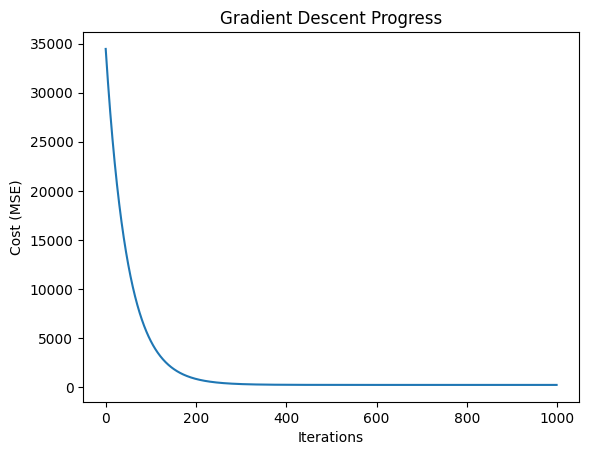

In [97]:
predictions = Lasso_model1.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {Lasso_model1.theta[0]}")
print(f"Learned Weights: \n{Lasso_model1.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(Lasso_model1.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [98]:
# predicting the Training data
train_predictions = Lasso_model1.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = Lasso_model1.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 467.42
Testing MSE:  540.57
Overfitting Gap: 73.15


## model 2 (lambda = 10)

Final Test MSE: 541.1569043710226
Learned Bias: [256.24235482]
Learned Weights: 
[[ 2.72021161e+01]
 [-3.48737877e+01]
 [-1.19062728e-02]
 [ 5.44173129e-05]
 [ 1.27671127e-01]
 [ 6.30059948e-01]
 [ 8.34960641e-01]
 [ 2.52698400e-01]
 [-1.70662838e+00]
 [-4.71184093e-01]
 [-4.66429008e-01]
 [ 7.51918402e-02]
 [-8.97267681e-01]
 [ 7.17319426e-03]
 [-5.14354560e-01]
 [ 4.15630623e-01]
 [ 6.77013246e-02]]


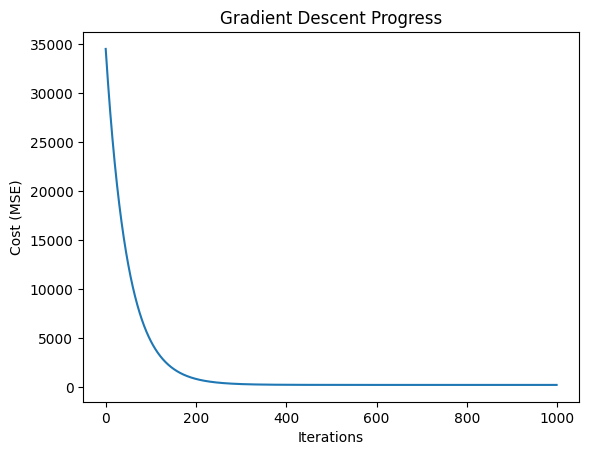

In [99]:
predictions = Lasso_model2.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {Lasso_model2.theta[0]}")
print(f"Learned Weights: \n{Lasso_model2.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(Lasso_model2.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [100]:
# predicting the Training data
train_predictions = Lasso_model2.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = Lasso_model2.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 467.40
Testing MSE:  541.16
Overfitting Gap: 73.75


## model 3 (lambda = 500)

Final Test MSE: 539.6489410006066
Learned Bias: [256.22940132]
Learned Weights: 
[[ 2.68190149e+01]
 [-3.45222113e+01]
 [ 3.00821650e-03]
 [ 6.12006923e-03]
 [ 6.02644904e-03]
 [ 6.81596644e-02]
 [ 2.00966368e-01]
 [ 6.11271962e-03]
 [-1.05554120e+00]
 [-8.48077974e-03]
 [-3.06499640e-03]
 [ 2.94304495e-03]
 [-2.94988892e-01]
 [-4.31520796e-03]
 [-5.89442718e-03]
 [ 8.78013659e-03]
 [ 3.17864145e-03]]


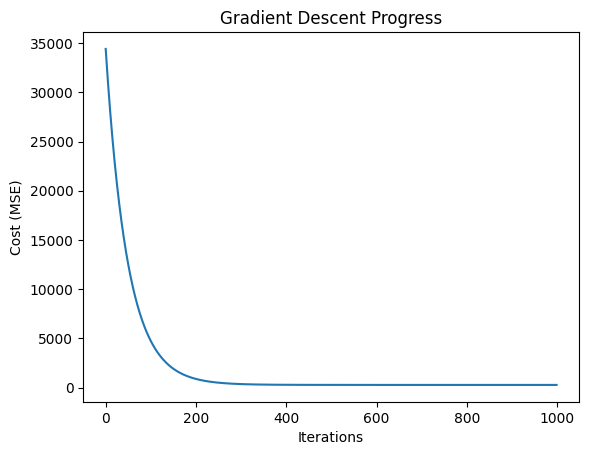

In [101]:
predictions = Lasso_model3.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {Lasso_model3.theta[0]}")
print(f"Learned Weights: \n{Lasso_model3.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(Lasso_model3.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [102]:
# predicting the Training data
train_predictions = Lasso_model3.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = Lasso_model3.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 470.26
Testing MSE:  539.65
Overfitting Gap: 69.38


as u can see the noise weights got crushed almost perfectly  
but why did they never reach the 0?  
that is a famous limitation of standard Gradient Descent!  
Because standard Gradient Descent takes fixed "steps" (lr=0.01), when the weight gets incredibly close to zero, the np.sign() penalty makes the math "bounce" slightly back and forth across zero (like stepping over a line by an inch, then stepping back).  
This is exactly why professional libraries like Scikit-Learn do not use standard Gradient Descent for Lasso. They use a different calculus solver called Coordinate Descent which is mathematically designed to snap those bouncing numbers to a hard 0.0.  

# model training (Ridge multiple linear regression)

In [103]:
class RidgeMultipleLinearRegression:
    def __init__(self, lr=0.01, n_iters=1000, lambda_=50):
        self.lr = lr
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.theta = None
        self.cost_history = []

    def fit(self, x, y):
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = x.shape
        
        # Initializing weights randomly
        self.theta = np.random.rand(n_features, 1)

        # gradient descent loop
        for i in range(self.n_iters):
            predictions = np.dot(x, self.theta)

            error = predictions - y

            theta_penalized = np.copy(self.theta)
            theta_penalized[0] = 0 

            gradient = (1 / n_samples) * np.dot(x.T, error) + (self.lambda_ / n_samples) * theta_penalized

            self.theta -= (self.lr * gradient)

            cost = (1 / (2 * n_samples)) * np.sum(error ** 2) + (self.lambda_ / (2 * n_samples)) * np.sum(theta_penalized ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.theta)

In [104]:
ridge_model1 = RidgeMultipleLinearRegression(.01, 1000)
ridge_model1.fit(X_train, Y_train)

# Try a weak penalty
ridge_model2 = RidgeMultipleLinearRegression(lr=0.01, n_iters=1000, lambda_=10)
ridge_model2.fit(X_train, Y_train)

# Try a massive penalty 
ridge_model3 = RidgeMultipleLinearRegression(lr=0.01, n_iters=1000, lambda_=500)
ridge_model3.fit(X_train, Y_train)

## model 1 (lambda = 50)

Final Test MSE: 552.6970578228627
Learned Bias: [256.19962408]
Learned Weights: 
[[ 2.67926668e+01]
 [-3.33756780e+01]
 [ 3.69049863e-02]
 [-5.50212223e-02]
 [ 1.54283387e-01]
 [ 5.29753821e-01]
 [ 6.79969444e-01]
 [ 2.06409311e-01]
 [-1.54851407e+00]
 [-5.04210833e-01]
 [-4.71989931e-01]
 [ 7.52100003e-02]
 [-8.13955296e-01]
 [ 1.67899914e-01]
 [-5.41847954e-01]
 [ 2.88222957e-01]
 [ 2.33967317e-02]]


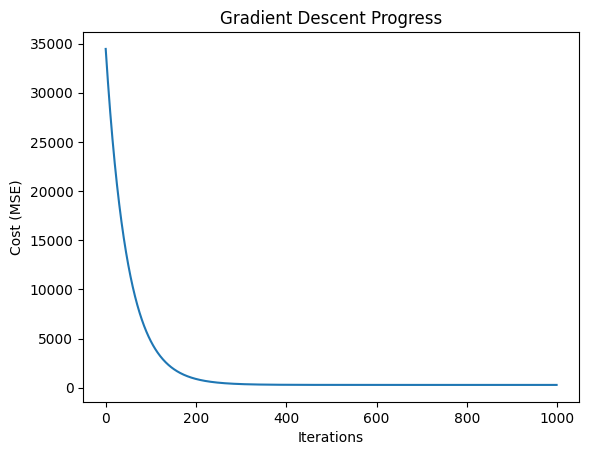

In [105]:
predictions = ridge_model1.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {ridge_model1.theta[0]}")
print(f"Learned Weights: \n{ridge_model1.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(ridge_model1.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [106]:
# predicting the Training data
train_predictions = ridge_model1.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = ridge_model1.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 471.30
Testing MSE:  552.70
Overfitting Gap: 81.39


## model 2 (lambda = 10)

Final Test MSE: 543.0223107025066
Learned Bias: [256.23425695]
Learned Weights: 
[[ 2.70797990e+01]
 [-3.46151409e+01]
 [-1.07605965e-02]
 [-8.63526627e-03]
 [ 1.42145936e-01]
 [ 6.18942668e-01]
 [ 8.13961677e-01]
 [ 2.52943920e-01]
 [-1.68452734e+00]
 [-4.90120249e-01]
 [-4.76119225e-01]
 [ 8.54370915e-02]
 [-8.89887841e-01]
 [ 5.00604738e-02]
 [-5.26996841e-01]
 [ 3.95076111e-01]
 [ 6.73823277e-02]]


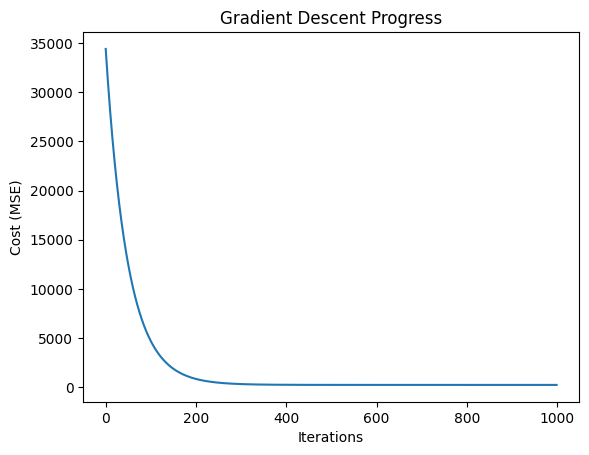

In [107]:
predictions = ridge_model2.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {ridge_model2.theta[0]}")
print(f"Learned Weights: \n{ridge_model2.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(ridge_model2.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [108]:
# predicting the Training data
train_predictions = ridge_model2.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = ridge_model2.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 467.59
Testing MSE:  543.02
Overfitting Gap: 75.43


## model 3 (lambda = 500)

Final Test MSE: 774.026332427951
Learned Bias: [255.92764805]
Learned Weights: 
[[ 2.22112025e+01]
 [-2.49249026e+01]
 [ 2.82491365e-01]
 [-2.98217509e-01]
 [ 2.13017624e-01]
 [ 1.37345796e-02]
 [-1.01876396e-01]
 [-6.61551551e-02]
 [-6.69503435e-01]
 [-5.83984292e-01]
 [-3.90995077e-01]
 [ 3.31279335e-02]
 [-3.49366321e-01]
 [ 7.95713205e-01]
 [-4.96850933e-01]
 [-3.15255022e-01]
 [-1.78212389e-01]]


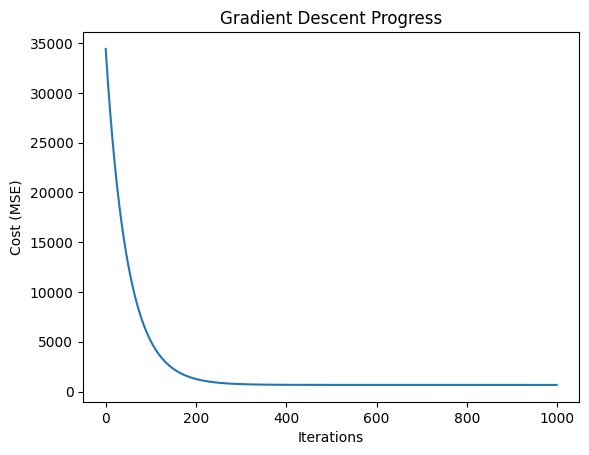

In [109]:
predictions = ridge_model3.predict(X_test).flatten()

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {ridge_model3.theta[0]}")
print(f"Learned Weights: \n{ridge_model3.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(ridge_model3.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

In [110]:
# predicting the Training data
train_predictions = ridge_model3.predict(X_train).flatten()
train_mse = np.mean((train_predictions - Y_train)**2)

# predicting the Test data
test_predictions = ridge_model3.predict(X_test).flatten()
test_mse = np.mean((test_predictions - Y_test)**2)

# Print the Diagnosis
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE:  {test_mse:.2f}")

# Calculate the Overfitting Gap
print(f"Overfitting Gap: {(test_mse - train_mse):.2f}")

Training MSE: 678.31
Testing MSE:  774.03
Overfitting Gap: 95.71
